In [1]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import lightkurve as lk
from matplotlib import rc
rc('font', **{'family':'serif','serif':['Helvetica']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 14})

Matplotlib is building the font cache; this may take a moment.


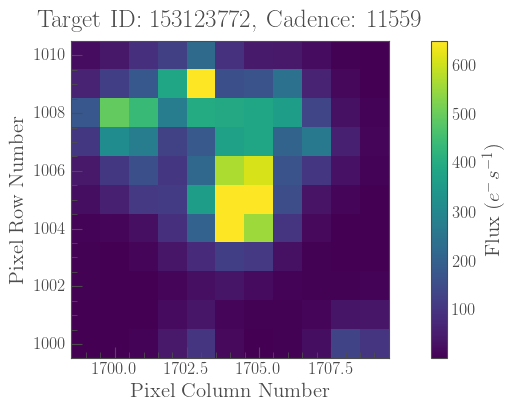

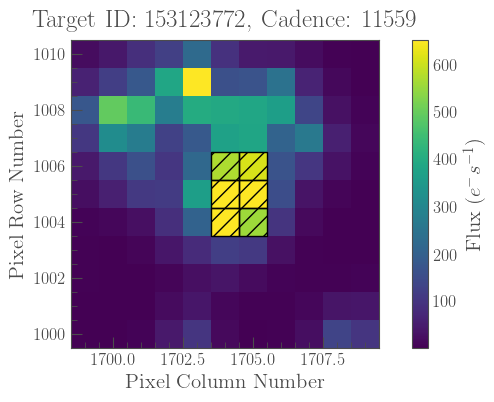

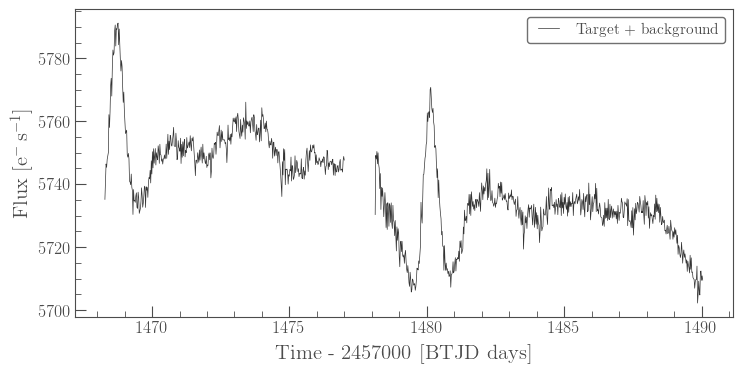

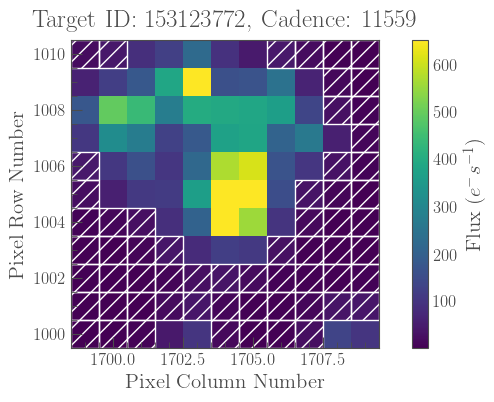

61

In [16]:
## SECTOR 6
tpf = lk.search_targetpixelfile('TIC 153123772', mission="TESS").download_all(quality_bitmask=195, flux_column='pdcsap_flux')
tpf[0].plot()
#plt.figure(figsize=(8,8))
fig=plt.gcf()
fig.tight_layout(pad=0.2)
fig.savefig('./sec6_1.jpg', dpi=200)
ns=0
target_mask = tpf[ns].create_threshold_mask(threshold=5.04, reference_pixel='center')
plt.show( tpf[ns].plot(aperture_mask=target_mask, mask_color='k') )
n_target_pixels = target_mask.sum()
n_target_pixels
target_lc = tpf[ns].to_lightcurve(aperture_mask=target_mask,) ## convert to light curve 
plt.show( target_lc.plot(label='Target + background') )# plot its light curve 
background_mask = ~tpf[ns].create_threshold_mask(threshold=0.001, reference_pixel=None)# estimating background
plt.show(tpf[ns].plot(aperture_mask=background_mask, mask_color='w') )
n_background_pixels = background_mask.sum()
n_background_pixels

<Figure size 640x480 with 0 Axes>

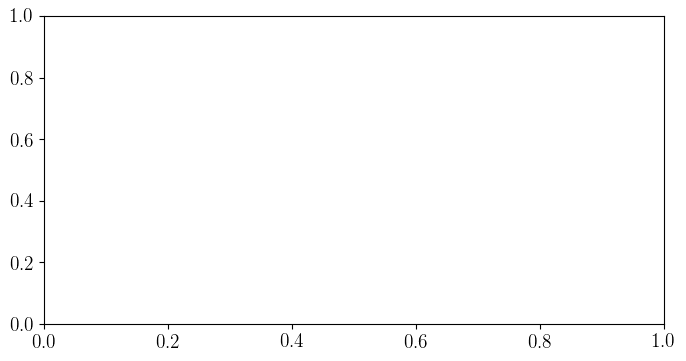

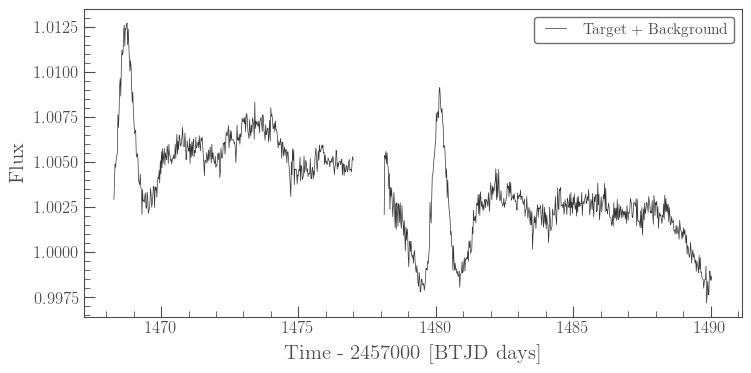

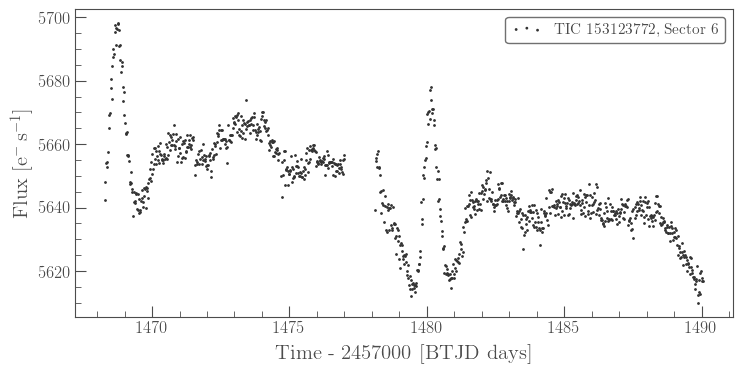

[1468.28559041 1468.3064239  1468.3272574  1468.34809089 1468.36892438
 1468.41059136 1468.43142485 1468.45225834 1468.47309183 1468.49392532
 1468.5147588  1468.53559229 1468.55642577 1468.57725926 1468.59809274
 1468.61892622 1468.6397597  1468.66059318 1468.68142666 1468.70226014
 1468.72309362 1468.7439271  1468.76476057 1468.78559405 1468.80642752
 1468.827261   1468.84809447 1468.86892794 1468.88976141 1468.91059489
 1468.93142836 1468.95226182 1468.97309529 1468.99392876 1469.01476223
 1469.03559569 1469.05642916 1469.07726262 1469.09809608 1469.11892955
 1469.13976301 1469.16059647 1469.18142993 1469.20226339 1469.22309684
 1469.2439303  1469.26476376 1469.28559721 1469.30643067 1469.32726412
 1469.34809758 1469.36893103 1469.38976448 1469.41059793 1469.43143138
 1469.45226483 1469.47309828 1469.49393173 1469.51476517 1469.53559862
 1469.55643206 1469.57726551 1469.59809895 1469.6189324  1469.63976584
 1469.66059928 1469.68143272 1469.70226616 1469.7230996  1469.74393303
 1469.

ValueError: setting an array element with a sequence.

In [12]:
from astropy.io import ascii

background_lc_per_pixel = tpf[ns].to_lightcurve(aperture_mask=background_mask) / n_background_pixels
background_estimate_lc = background_lc_per_pixel * n_target_pixels
common_normalization = np.nanpercentile(target_lc.flux, 10)
ax =(target_lc / common_normalization).plot(normalize=False, label='Target + Background', markersize=4.0);
#(background_estimate_lc / common_normalization +1).plot(ax=ax, normalize=False, label='Background',
#                                                        ylabel='Normalized, shifted flux');
corrected_lc = target_lc - background_estimate_lc.flux
plt.show( corrected_lc.scatter(label='TIC 153123772, Sector 6') )
#background_estimate_lc.flux
#background_estimate_lc.time


ascii.write(corrected_lc['time',     'flux',     'flux_err'][:], 'Sector6SAPdata.dat', overwrite=True, format='no_header')  
'''
print(corrected_lc.time, corrected_lc.flux,corrected_lc.flux_err)
'''

<Figure size 640x480 with 0 Axes>

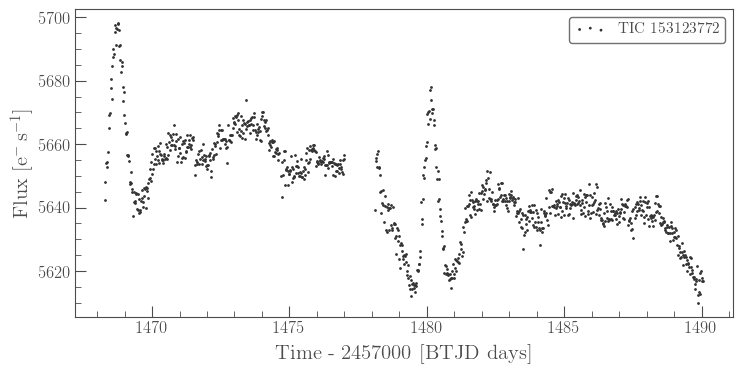

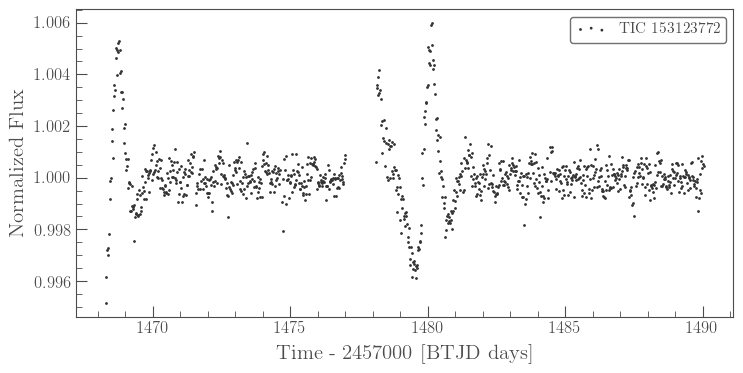

In [34]:
from astropy.io import ascii
period_days = 11.393423143561519 
epoch_time = 2209.361653386310
#corrected_lc=gaussian_filter(corrected_lc, 1.4)

plt.cla()
plt.clf()
plt.show( corrected_lc.scatter() )
ax = corrected_lc.flatten(81).scatter()##.fold(period_days, epoch_time=epoch_time).scatter()##.scatter()
plt.show()
clc= corrected_lc.flatten(81) #.fold(period_days, epoch_time=epoch_time)
ascii.write(clc['time',      'flux',       'flux_err'][:], './Sector6data.dat', overwrite=True, format='no_header')  
#print (len(clc['time']))
#print ( clc['time'] )
#ascii.write(clc, 'values_new.dat', overwrite=True)  